In [11]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sb
import matplotlib.patches as patches
import matplotlib.path as path

In [2]:
connection = psycopg2.connect(database="regressiondata", host="lapisco2.fortaleza.ifce.edu.br", port=3432, user="conceptu", password="conceptu@ifce")

In [3]:
cursor = connection.cursor()

In [4]:
cursor.execute("""SELECT *  FROM timeseries;""")
fetch = cursor.fetchall()
timeseries_description = [i[0] for i in cursor.description]
timeseries_table = pd.DataFrame(fetch,columns= timeseries_description)
display(timeseries_table)

,id,created_at,updated_at,occurred_at,consumption_points,power_factor,total_consumption,power_plant_id,under_maintenance
0,3680,2022-08-14 22:55:27.774803-03:00,2022-08-14 22:55:27.774803-03:00,2021-05-26,"[1.0, None, None, None, None, None, None, None...","[-0.97, None, None, None, None, None, None, No...",930.0,2920,None
1,3681,2022-08-14 22:55:27.789920-03:00,2022-08-14 22:55:27.789920-03:00,2021-05-27,"[0.25, None, None, None, None, None, None, Non...","[-0.83, None, None, None, None, None, None, No...",980.0,2920,None
2,3682,2022-08-14 22:55:27.808443-03:00,2022-08-14 22:55:27.808443-03:00,2021-05-28,"[0.27, None, None, None, None, None, None, Non...","[-0.78, None, None, None, None, None, None, No...",903.0,2920,None
3,3683,2022-08-14 22:55:27.825419-03:00,2022-08-14 22:55:27.825419-03:00,2021-05-29,"[0.22, None, None, None, None, None, None, Non...","[-0.73, None, None, None, None, None, None, No...",58.0,2920,None
4,3684,2022-08-14 22:55:27.841074-03:00,2022-08-14 22:55:27.841074-03:00,2021-05-30,"[0.46, None, None, None, None, None, None, Non...","[-0.91, None, None, None, None, None, None, No...",35.0,2920,None
...,...,...,...,...,...,...,...,...,...
328,3675,2022-08-14 22:55:27.692514-03:00,2022-08-14 22:55:27.692514-03:00,2021-05-21,"[0.93, None, None, None, None, None, None, Non...","[-0.98, None, None, None, None, None, None, No...",844.0,2920,None
329,3676,2022-08-14 22:55:27.710950-03:00,2022-08-14 22:55:27.710950-03:00,2021-05-22,"[0.28, None, None, None, None, None, None, Non...","[-0.81, None, None, None, None, None, None, No...",40.0,2920,None
330,3677,2022-08-14 22:55:27.725324-03:00,2022-08-14 22:55:27.725324-03:00,2021-05-23,"[0.91, None, None, None, None, None, None, Non...","[-0.97, None, None, None, None, None, None, No...",27.0,2920,None
331,3678,2022-08-14 22:55:27.741929-03:00,2022-08-14 22:55:27.741929-03:00,2021-05-24,"[0.22, None, None, None, None, None, None, Non...","[-0.71, None, None, None, None, None, None, No...",908.0,2920,None


In [5]:
ocurrent_month = timeseries_table['occurred_at']
consumption_total = timeseries_table['total_consumption']


<Figure size 2000x1000 with 0 Axes>

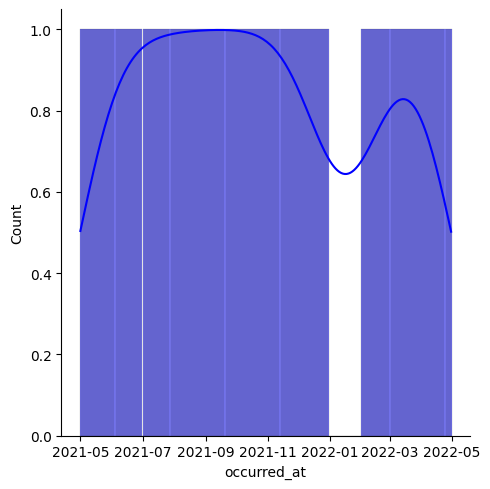

In [14]:
plt.figure(figsize = (20,10))
sb.displot(ocurrent_month, color='b', bins=consumption_total, kde=True)

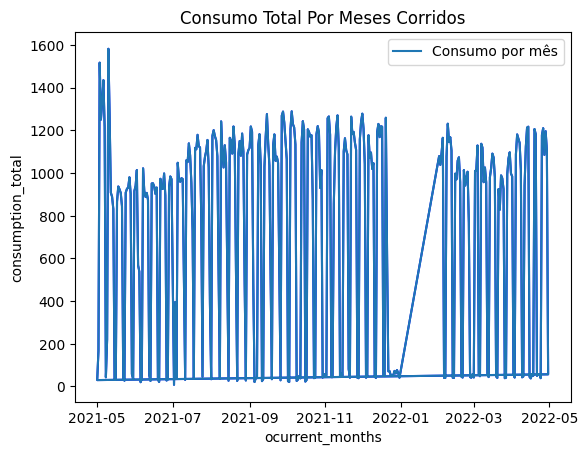

In [ ]:
plt.plot(ocurrent_month, consumption_total, color= 'b')
plt.title('Consumo Total Por Meses Corridos')
plt.plot(ocurrent_month, consumption_total, label = 'Consumo por mês')
plt.legend()
plt.xlabel('ocurrent_months')
plt.ylabel('consumption_total')
plt.show()

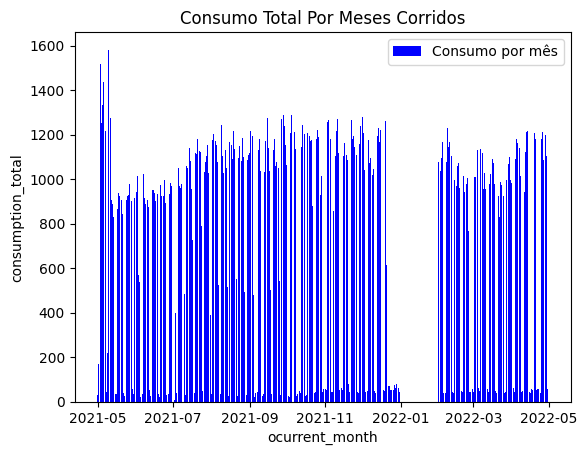

In [ ]:
plt.bar(ocurrent_month, consumption_total, label = 'Consumo por mês', color= 'b')
plt.legend()
plt.title('Consumo Total Por Meses Corridos')
plt.xlabel('ocurrent_month')
plt.ylabel('consumption_total')
plt.show()

In [ ]:
timeseries_table.hist(column= consumption_total)

KeyError: "None of [Index([(930.0, 980.0, 903.0, 58.0, 35.0, 916.0, 940.0, 1014.0, 568.0, 538.0, 20.0, 35.0, 1022.0, 916.0, 888.0, 907.0, 874.0, 52.0, 26.0, 951.0, 952.0, 937.0, 902.0, 932.0, 33.0, 21.0, 973.0, 925.0, 926.0, 998.0, 894.0, 28.0, 33.0, 935.0, 984.0, 971.0, 8.0, 396.0, 37.0, 1048.0, 968.0, 959.0, 976.0, 972.0, 484.0, 31.0, 1060.0, 1051.0, 1139.0, 1083.0, 955.0, 728.0, 37.0, 1118.0, 1111.0, 1179.0, 1125.0, 1120.0, 788.0, 46.0, 1032.0, 1076.0, 1104.0, 1155.0, 1026.0, 390.0, 34.0, 1174.0, 1201.0, 1173.0, 1154.0, 1078.0, 524.0, 36.0, 1242.0, 1102.0, 1026.0, 1130.0, 1050.0, 515.0, 27.0, 1165.0, 1151.0, 1091.0, 1218.0, 1136.0, 552.0, 26.0, 1093.0, 1150.0, 1081.0, 1185.0, 1100.0, 494.0, 28.0, 1086.0, 1107.0, 1118.0, 1218.0, 1193.0, ...)], dtype='object')] are in the [columns]"